#  `mesh_surface_area`

Calculates the surface area of a meshed region using scikit-image `measure.mesh_surface_area` method.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps
import inspect
inspect.signature(ps.metrics.mesh_surface_area)

<Signature (mesh=None, verts=None, faces=None)>

## `mesh`
The input can be either `mesh` or `verts and faces` to calculate the surface area of a meshed region. `mesh` tuple can be generated using the `mesh_region` function. Let's first create a `mesh` for a random blob:

surface area of void space is 45683.796875


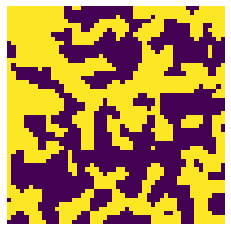

In [2]:
np.random.seed(10)
im = ps.generators.blobs(shape=[50, 50, 50])
mesh = ps.tools.mesh_region(region=im)
surface_area = ps.metrics.mesh_surface_area(mesh=mesh)
print('surface area of void space is', str(surface_area))
fig, ax = plt.subplots(1, 1, figsize=[4, 4])
ax.imshow(im[:,:,5], origin='lower', interpolation='none')
ax.axis(False);

## `verts`, `faces`
If `mesh` is not provided as the input, the `verts` and `faces` data must be given. `verts` and `faces` data of a meshed region can be calculated using porespy's `mesh_region` function or directly from `skimage.measure.marching_cubes` function. Porespy's `mesh_region` calls `skimage.measure.marching_cubes` method to mesh a region using marching cube algorithm.

In [3]:
verts, faces = mesh['verts'], mesh['faces']
surface_area = ps.metrics.mesh_surface_area(verts=verts, faces=faces)
print('surface area of void space is', str(surface_area))

surface area of void space is 45683.796875


Now let's try this method on only a pore region of a segmented image for visualization purpose. Note that to calculate the surface area of each region in a segmented image, we can use porespy's `region_surface_areas` method instead.

0it [00:00, ?it/s]

surface area of the meshed pore region 45683.796875


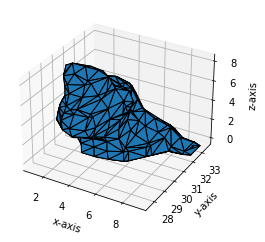

In [4]:
snow = ps.filters.snow_partitioning(im)
regions = snow.regions/im
region = regions==30
mesh = ps.tools.mesh_region(region=region)
ps.visualization.show_mesh(mesh)
area = ps.metrics.mesh_surface_area(verts=verts, faces=faces)
print('surface area of the meshed pore region '+str(area))